## Klassisk mekanikk numerisk øving 2
Eirik Jaccheri Høydalsvik, Hans Gløckner Giil

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#some constants
t0 = 0
g = 9.81
l = g
m = 1
q = 0.5
omega_d = 2/3
omega = np.sqrt(g / l) #NB; we will use omega as a helping constant, and thetaDot as the time-derivative of the angle

theta0 = 0.2
thetaDot0 = 0
u0 = np.array((theta0, thetaDot0))

#RK4, solves differential equation f. here: u0 = [theta, theta_dot]
def kutta_4(f, u0, t0, tNum, dt, q, F_d, omega_d):
    U = np.zeros( ((tNum),  u0.size) )
    U[0] = u0
    for i in range(1 ,tNum):
        F1 = f(i * dt, U[i-1], q, F_d, omega_d)
        F2 = f(i * dt + dt / 2, U[i-1] + dt  / 2 * F1, q, F_d, omega_d)
        F3 = f(i * dt + dt / 2, U[i-1] + dt / 2 * F2, q, F_d, omega_d)
        F4 = f(i * dt + dt, U[i-1] + dt * F3, q, F_d, omega_d)
        U[i] = U[i-1] + dt / 6 * (F1 + 2* F2 + 2 * F3 + F4)        
    return U

def f_driven (t, u, q, F_d , omega_d): #with driving force F(t) / m / l = D_d * sin(omega_d* t) 
    return np.array([u[1], - omega**2 * np.sin(u[0]) - q * u[1]  + F_d * np.sin(omega_d * t)])


def energy(u_arr): #Y is array containing vectors with theta, thetaDot at different times
    return pot(u_arr) + kin(u_arr)

def pot(u_arr):
    return  m * g * l * u_arr.T[0]**2 / 2

def kin(u_arr):
    return 0.5 * m * ( l * u_arr.T[1])**2

def work(u_arr): #difference between starting energy and energy at different times
    return energy(u_arr)[0] - energy(u_arr)

In [3]:
def time_evolve(u0,t0, tNum, dt, q, F_d, omega_d):
    t_arr = np.linspace(t0, t0 + dt * tNum, tNum)
    u_arr = kutta_4(f_driven, u0, t0, tNum, dt, q, F_d, omega_d)
    u_arr = (u_arr + np.pi) % (2*np.pi) - np.pi 
    return t_arr, u_arr

def plot_theta_3(u0,t0, tNum, dt, q, F_d, omega_d):
    t_arr, u_arr = time_evolve(u0,t0, tNum, dt, q, F_d, omega_d)
    
    fig, ax = plt.subplots()
    ax.plot(t_arr,u_arr.T[0])
    
    plt.tight_layout()
    plt.show()
    
def phase_difference(u0,t0, tNum, dt, q, F_d, omega_d, del_theta):
    u0_offset = np.array([u0[0] + del_theta,u0[1]])
    
    t_arr, u_arr = time_evolve(u0,t0, tNum, dt, q, F_d, omega_d)
    t_arr_offset, u_arr_offset = time_evolve(u0_offset,t0, tNum, dt, q, F_d, omega_d)
    
    del_theta_arr = u_arr.T[0] - u_arr_offset.T[0]
    
    return  t_arr_offset, u_arr_offset,  del_theta_arr

def plot_phase_difference(u0,t0, tNum, dt, q, F_d, omega_d, del_theta):
    t_arr, u_arr,  del_theta_arr = phase_difference(u0,t0, tNum, dt, q, F_d, omega_d, del_theta)
    
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(10, 8)
    ax1.plot(t_arr,u_arr.T[0])
    ax2.semilogy(t_arr,del_theta_arr)
    
    plt.tight_layout()
    plt.show()
    
def plot_phase_space(u0,t0, tNum, dt, q, F_d, omega_d):
    t_arr, u_arr = time_evolve(u0,t0, tNum, dt, q, F_d, omega_d)
    
    fig, (ax1,ax2) = plt.subplots(1,2)
    ax1.plot(u_arr.T[0],u_arr.T[1])
    n = int(2*np.pi / dt / omega_d)
    
    ax2.plot(u_arr.T[0][0::n],u_arr.T[1][0::n],".")

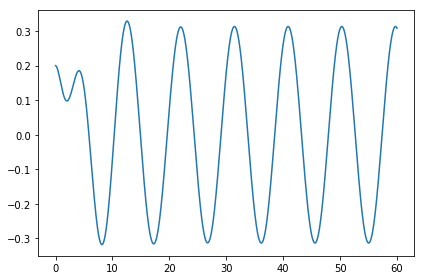

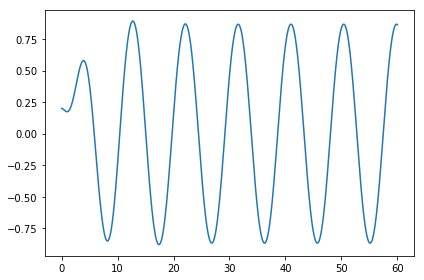

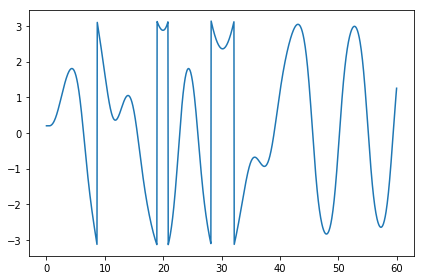

In [4]:
dt = 0.05
tNum = int(60 / dt)
F_d = 0.2
plot_theta_3(u0,t0, tNum, dt, q, F_d, omega_d)

F_d = 0.5
plot_theta_3(u0,t0, tNum, dt, q, F_d, omega_d)

F_d = 1.2
plot_theta_3(u0,t0, tNum, dt, q, F_d, omega_d)

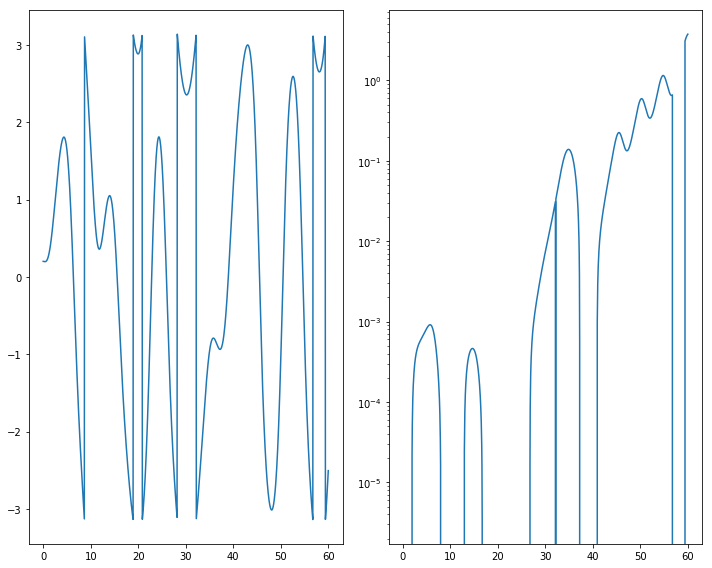

In [5]:
del_theta = 0.001
F_d = 1.2
plot_phase_difference(u0,t0, tNum, dt, q, F_d, omega_d, del_theta)

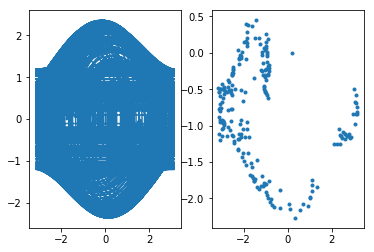

In [6]:
dt = np.pi / 1000 / omega_d
tNum = int(2000/dt)
F_d = 1.2
plot_phase_space(u0,t0, tNum, dt, q, F_d, omega_d)